# Appendix - Exploring Debt Price Heuristics
In this document we explore a few alternatives for modelling debt price as a function of the debt market activity. In all cases we assume the existence of a value function at the system level as a function of the total assets and liabilities in the system. We further assume this value to be an invariant. We explore different possible constructs for this value function, all of which take into account the notion of "debt price": a sort of "intrinsic value" of SAI derived from the activity in the debt system.

Define:
* Debt price: $\hat{p}$  
* Value function ("system level balance sheet"): $V(\mathcal{X},\hat{p})$  

Assume:
* $\hat{p}_0 = p^*_0$  
* $V_t=V_0 \forall t$   
    * $\implies V(\mathcal{X}_t,\hat{p}_t)=V_0$
    * which we can then solve for $\hat{p}_t$

In [1]:
import pandas as pd
debt_market_df = pd.read_csv('data/debt_market_df.csv')

# Option 1

* $V(\mathcal{X},\hat{p}) = assets - liabilities$  
    * $assets = Q\rho^* + D_1\hat{p}$  
    * $liabilities = D_1\hat{p} + D_2\hat{p}$  
* $V(\mathcal{X},\hat{p}) = Q\rho^* + D_1\hat{p} - D_1\hat{p} - D_2\hat{p}$  
* $V(\mathcal{X},\hat{p}) = Q\rho^* - D_2\hat{p}$  
* $Q_{t}\rho^*_{t} - D_{2;t}\hat{p}_{t} = V_0$
* $D_{2;t}\hat{p}_{t} = Q_{t}\rho^*_{t} - V_0$
* $\hat{p}_{t} = \frac{Q_{t}\rho^*_{t} - V_0}{D_{2;t}}$

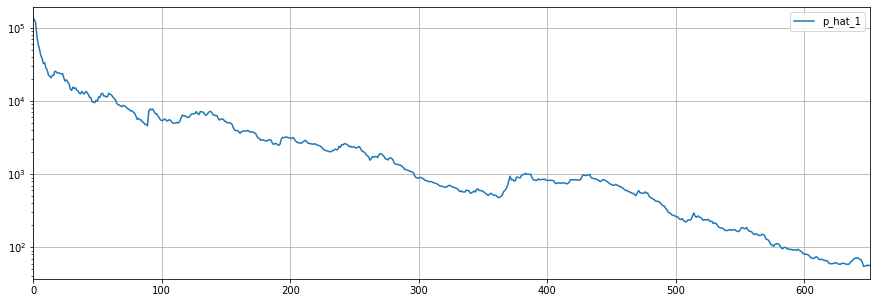

In [2]:
p_star_0 = debt_market_df.iloc[0]['p_star']
p_hat_0 = p_star_0
C_star_0 = debt_market_df.iloc[0]['C_star']
D_1_0 = debt_market_df.iloc[0]['D_1']
D_2_0 = debt_market_df.iloc[0]['D_2']
V_0 = C_star_0 - D_2_0 * p_hat_0

C_star = debt_market_df['C_star']
D_2 = debt_market_df['D_2']
debt_market_df['p_hat_1'] = (C_star - V_0) / D_2
debt_market_df.plot(y='p_hat_1', logy=True, figsize=(15,5), grid=True)

# Option 2

* $V(\mathcal{X},\hat{p}) = assets - liabilities$  
    * $assets = Q\rho^* + D_1\hat{p}$  
    * $liabilities = D_1 p^* + D_2p^*$  
* $V(\mathcal{X},\hat{p}) = Q\rho^* + D_1 (\hat p - p^*) - D_2p^*$  
* $Q_{t}\rho_{t}^* + D_{1; t} (\hat p_{t} - p_{t}^*) - D_{2:t}p^*_{t}=V_0$
* $D_{1; t} (\hat p_{t} - p_{t}^*) = V_0 - Q_{t}\rho_{t}^* + D_{2:t}p^*_{t+1}$
* $\hat p_{t} - p_{t}^* = \frac{V_0 - Q_{t}\rho_{t}^* + D_{2:t}p^*_{t}}{D_{1; t}}$
* $\hat p_{t} = \frac{V_0 - Q_{t}\rho_{t}^* + D_{2:t}p^*_{t}}{D_{1; t}} + p_{t}^*$

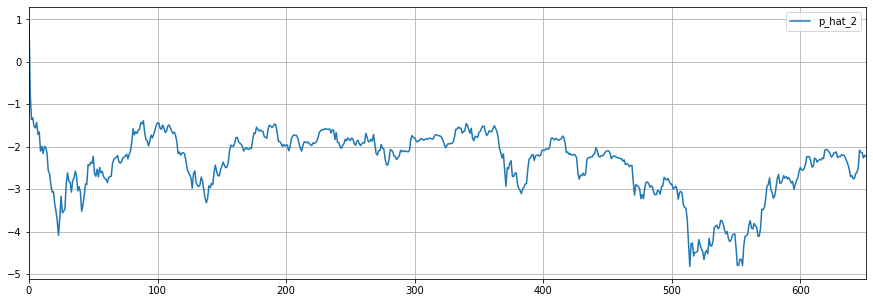

In [3]:
p_star_0 = debt_market_df.iloc[0]['p_star']
p_hat_0 = p_star_0
C_star_0 = debt_market_df.iloc[0]['C_star']
D_1_0 = debt_market_df.iloc[0]['D_1']
D_2_0 = debt_market_df.iloc[0]['D_2']
V_0 = C_star_0 + D_1_0 * (p_hat_0 - p_star_0) - D_2_0 * p_star_0

p_star = debt_market_df['p_star']
C_star = debt_market_df['C_star']
D_1 = debt_market_df['D_1']
D_2 = debt_market_df['D_2']
debt_market_df['p_hat_2'] = (V_0 - C_star + D_2 * p_star) / D_1 + p_star
debt_market_df.plot(y='p_hat_2', figsize=(15,5), grid=True)

# Option 3

* $V(\mathcal{X},\hat{p}) = assets - liabilities$  
    * $assets = Q\rho^* + D_1p^*$  
    * $liabilities = D_1 \hat{p} + D_2\hat{p}$  
* $V(\mathcal{X},\hat{p}) = Q\rho^* + D_1 (p^* - \hat{p}) - D_2\hat{p}$  
* $Q_t\rho^*_t + D_{1;t} (p^*_t - \hat{p}_t) - D_{2;t}\hat{p}_t = V_0$
* $Q_t\rho^*_t + D_{1;t} p^*_t - V_0 = (D_{1;t} + D_{2;t})\hat{p}_t$
* $\hat{p}_t = \frac{Q_t\rho^*_t + D_{1;t} p^*_t - V_0}{D_{1;t} + D_{2;t}}$

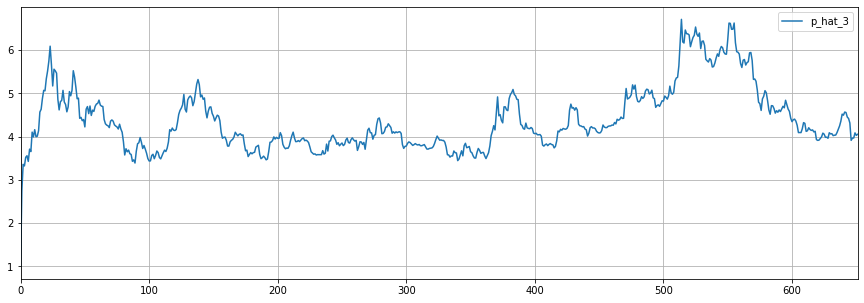

In [4]:
p_star_0 = debt_market_df.iloc[0]['p_star']
p_hat_0 = p_star_0
C_star_0 = debt_market_df.iloc[0]['C_star']
D_1_0 = debt_market_df.iloc[0]['D_1']
D_2_0 = debt_market_df.iloc[0]['D_2']
V_0 = C_star_0 + D_1_0 * (p_hat_0 - p_star_0) - D_2_0 * p_star_0

p_star = debt_market_df['p_star']
C_star = debt_market_df['C_star']
D_1 = debt_market_df['D_1']
D_2 = debt_market_df['D_2']
debt_market_df['p_hat_3'] = (C_star + D_1 * p_star - V_0) / (D_1 + D_2)
debt_market_df.plot(y='p_hat_3', figsize=(15,5), grid=True)

# Option 4

* $V(\mathcal{X},\hat{p}) = \frac{liabilities}{assets}$  
    * $assets = Q \rho^* + D_1 \hat{p}$  
    * $liabilities = D_1 \hat{p} + D_2 \hat{p}$  
* $V(\mathcal{X},\hat{p}) = \frac{D_1 \hat{p} + D_2 \hat{p}}{Q \rho^* + D_1 \hat{p}}$  
* $D_{1;t} \hat{p}_t + D_{2;t} \hat{p}_t = V_0 Q_t \rho^*_t + V_0 D_{1;t} \hat{p}_t$
* $D_{1;t} \hat{p}_t + D_{2;t} \hat{p}_t - V_0 D_{1;t} \hat{p}_t = V_0 Q_t \rho^*_t $
* $(D_{1;t} + D_{2;t} - V_0 D_{1;t}) \hat{p}_t = V_0 Q_t \rho^*_t $
* $\hat{p}_t = \frac{V_0 Q_t \rho^*_t}{D_{1;t} + D_{2;t} - V_0 D_{1;t}}$

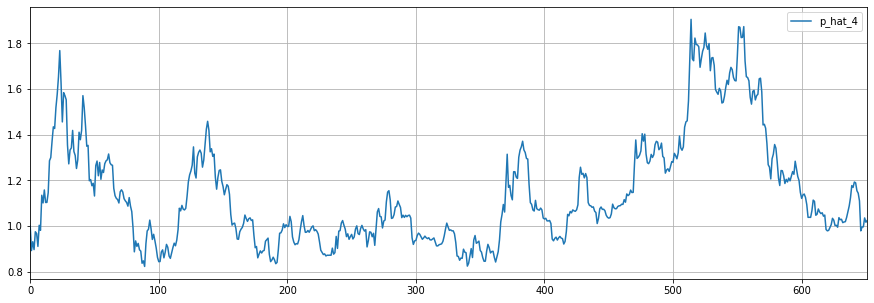

In [5]:
p_star_0 = debt_market_df.iloc[0]['p_star']
p_hat_0 = p_star_0
C_star_0 = debt_market_df.iloc[0]['C_star']
D_1_0 = debt_market_df.iloc[0]['D_1']
D_2_0 = debt_market_df.iloc[0]['D_2']
V_0 = (D_1_0 * p_hat_0 + D_2_0 * p_hat_0) / (C_star_0 + D_1_0 * p_hat_0)

p_star = debt_market_df['p_star']
C_star = debt_market_df['C_star']
D_1 = debt_market_df['D_1']
D_2 = debt_market_df['D_2']
debt_market_df['p_hat_4'] = C_star * V_0 / (D_1 + D_2 - V_0 * D_1)
debt_market_df.plot(y='p_hat_4', figsize=(15,5), grid=True)

# Option 5

* $V(\mathcal{X},\hat{p}) = \frac{liabilities}{assets}$  
    * $assets = Q \rho^* + D_1 p^*$  
    * $liabilities = D_1 \hat{p} + D_2 \hat{p}$  
* $V(\mathcal{X},\hat{p}) = \frac{D_1 \hat{p} + D_2 \hat{p}}{Q \rho^* + D_1 p^*}$  
* $D_{1;t} \hat{p}_t + D_{2;t} \hat{p}_t = V_0 (Q_t \rho^*_t + D_{1;t} p^*_t)$
* $ \hat{p}_t = \frac{V_0 (Q_t \rho^*_t + D_{1;t} p^*_t)}{D_{1;t} + D_{2;t}}$

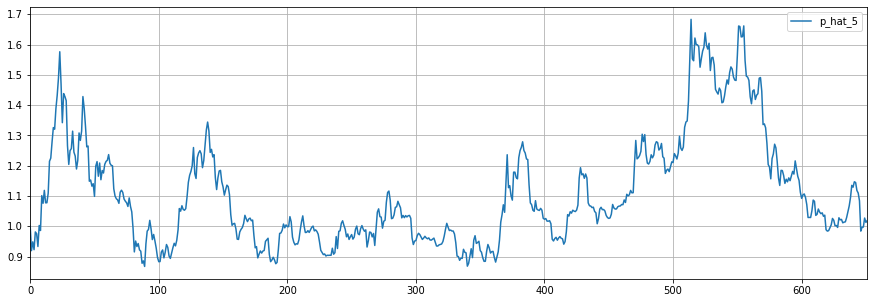

In [6]:
p_star_0 = debt_market_df.iloc[0]['p_star']
p_hat_0 = p_star_0
C_star_0 = debt_market_df.iloc[0]['C_star']
D_1_0 = debt_market_df.iloc[0]['D_1']
D_2_0 = debt_market_df.iloc[0]['D_2']
V_0 = (D_1_0 * p_hat_0 + D_2_0 * p_hat_0) / (C_star_0 + D_1_0 * p_star_0)

p_star = debt_market_df['p_star']
C_star = debt_market_df['C_star']
D_1 = debt_market_df['D_1']
D_2 = debt_market_df['D_2']
debt_market_df['p_hat_5'] = V_0 * (C_star + D_1 * p_star) / (D_1 + D_2)
debt_market_df.plot(y='p_hat_5', figsize=(15,5), grid=True)

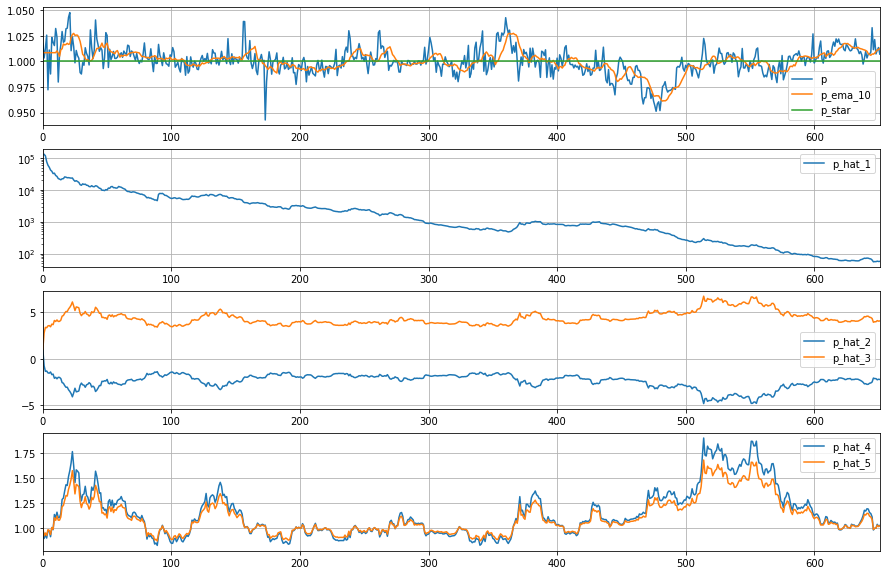

In [7]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(4, 1, figsize=(15,10))

debt_market_df.plot(y=['p', 'p_ema_10', 'p_star'], ax=axs[0], grid=True)
debt_market_df.plot(y=['p_hat_1'], logy=True, ax=axs[1], grid=True)
debt_market_df.plot(y=['p_hat_2'], ax=axs[2], grid=True)
debt_market_df.plot(y=['p_hat_3'], ax=axs[2], grid=True)
debt_market_df.plot(y=['p_hat_4'], ax=axs[3], grid=True)
debt_market_df.plot(y=['p_hat_5'], ax=axs[3], grid=True)